## Домашнее задание "Теория вероятности. Непрерывные Случайные Величины".

### Уровень 0:

#### Задание 1:

Получить интуицию, на что влияют параметры распределений. 

Построить по 5 функций плотностей с разными параметрами для каждого распределения: нормальное, экспоненциальное, Стьюдента на одном графике.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
plt.style.use('ggplot')

Параметры распределения влияют на форму этого распределения.

### Нормальное распределение

Параметр loc задаёт $\mu$, scale — среднеквадратичное отклонение $\sigma$, size — размер выборки.

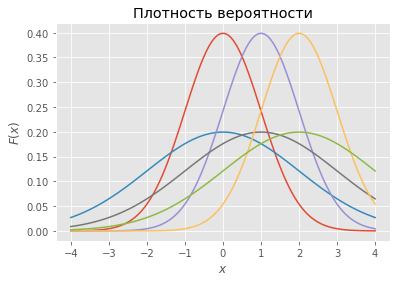

<Figure size 432x288 with 0 Axes>

In [2]:
for mu in [0, 1, 2]:          # среднее арифметическое
    for sigma in [1, 2]:        # среднее квадратическое отклонение

        # зададим нормально распределенную случайную величину
        norm_rv = sts.norm(loc=mu, scale=sigma)
        
        # сгенерируем 30 значений
        norm_rv.rvs(size=30)

        x = np.linspace(-4,4,100)
        pdf = norm_rv.pdf(x) # Функция плотности вероятности

        plt.plot(x, pdf)
        plt.ylabel('$F(x)$')
        plt.xlabel('$x$')
        plt.grid(True)
        plt.title('Плотность вероятности')
plt.figure()
plt.show()

### Экспоненциальное распредление

Здесь $\ lamda$ - единственный параметр распределения, полностью определяющий его свойства.

Экспоненциальное распределение моделирует время между двумя последовательными событиями, а параметр $\ lamda$ описывает среднее число наступлений события в единицу времени.

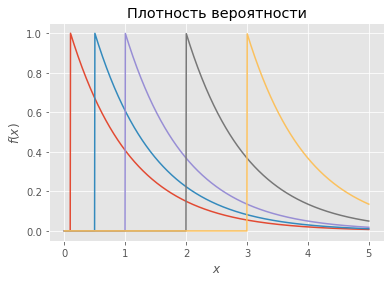

<Figure size 432x288 with 0 Axes>

In [3]:
for lam in [0.1, 0.5, 1, 2, 3]:   # параметр распределения lamda (распределение зависит от длины участка)

    # зададим экспоненциальную непрерывную случайную величину
    expon_rv = sts.expon(lam)

    # сгенерируем 10 значений
    expon_rv.rvs(10)

    x = np.linspace(0,5,1000)
    pdf = expon_rv.pdf(x)      # Функция плотности вероятности
    plt.plot(x, pdf)

    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.grid(True)
    plt.title('Плотность вероятности')
plt.figure()
plt.show()

### Распределение Стьюдента

Распределение Стьюдента (t - распределение)  - несколько испытаний из одного и того же распределения.

$ t$ - непрерывная случайная величина со степенями свободы $ n$

График функции плотности t-распределения симметричен, а его форма напоминает форму колокола, как у стандартного нормального распределения, но он ниже и шире.

По мере возрастания $ n$ кривая функции плотности все больше напоминает стандартное нормальное распределение.

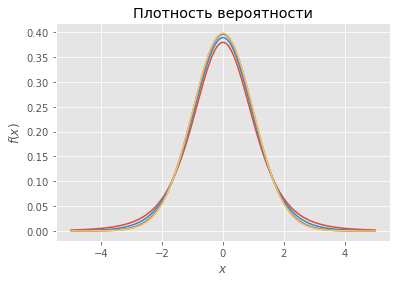

<Figure size 432x288 with 0 Axes>

In [4]:
for n in [5, 10, 30, 50, 100]:   # число степеней свободы

    # зададим непрерывную случайную величину Стьюдента
    t_rv = sts.t(n)

    # сгенерируем 10 значений
    t_rv.rvs(10)

    x = np.linspace(-5, 5,1000)
    pdf = t_rv.pdf(x)           # Функция плотности вероятности
    plt.plot(x, pdf)

    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.grid(True)
    plt.title('Плотность вероятности')

plt.figure()
plt.show()

### Уровень 1

#### Задание 2
Непрерывная случайная величина задана плотностью распределения:$$ f(\xi) = C, \xi \in [0;5];f(\xi) = 0, \xi \notin [0;5]$$Найдите C, математическое ожидание $\xi$ а также вероятность попадания в отрезок $[3.5;7]$, т.е. P(3.5 < $\xi$ < 7).

##### Плотность распределения должна удовлетворять условию 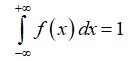

$\int\limits_{-}^{+}f(\xi)d\xi$ = $\int\limits_{-}^{0} 0*d\xi$ + $\int\limits_{0}^{5} C*d\xi$ +$\int\limits_{5}^{+} 0*d\xi$ = $\int\limits_{0}^{5} C*d\xi$ = $C*\xi \int\limits_{0}^{5}$ = $C*(5-0)$ = 1,

$$ C = 1/5 = 0.2 $$

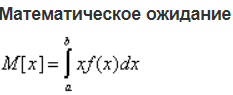

$\int\limits_{0}^{5} \xi*C*d\xi$ = $C*\xi^2/2\int\limits_{0}^{5}$ = 0.2*(25-0)/2 = 2.5

##### Вероятность попадания в отрезок  [3.5;7] , т.е. P(3.5 <  𝜉  < 7)$

$\int\limits_{3.5}^{7}f(\xi)d\xi$ = $\int\limits_{3.5}^{7} C*d\xi$ = $C*\xi \int\limits_{3.5}^{7}$ = $0.2*(7-3.5)$ = 0.7

#### Задание 3
Известно, что светофор горит 54 секунды красным, 4 секунды жёлтым и 28 секунд зелёным. Посчитайте, какое количество информации несёт сообщение о цвете светофора в текущий момент. А что будет в случае 28, 28 и 28 секунд для каждого цвета?

Формула Шенонна или информационной энтропии 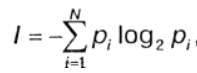

$I = — ( p1log2 p1 + p2 log2 p2 + . . . + pN log2 pN)$,
где $I$ - количество передаваемой информации

$ P = n/m$, где $n$ - количество интересующих нас событий, $m$ - общее количество возможных вариантов.

In [5]:
p1 = 54/(54+4+28)
p2 = 4/(54+4+28)
p3 = 28/(54+4+28)

p1, p2, p3

(0.627906976744186, 0.046511627906976744, 0.32558139534883723)

In [7]:
import math
I = -(p1*math.log2(p1) + p2*math.log2(p2) + p3*math.log2(p3))
I

1.154522162441165

В случае, если для каждого цвета будет по 28 секунд, применим упрощенную формулу $равновероятных$ $событий$:

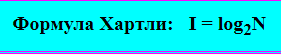
где $I$ - количество передаваемой информации, $N$ - возможное количество различных (равновероятных) сообщений.

In [8]:
I2 = math.log2(3)
I2

1.584962500721156